In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import numpy as np


In [10]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

In [43]:
# Create output directory
output_dir = Path('eda_visualizations')
output_dir.mkdir(exist_ok=True)

In [14]:
# Load the dataset
df = pd.read_csv('final_with_coordinates.csv')

In [15]:
# Convert date_and_time_utc to datetime
df['date_and_time_utc'] = pd.to_datetime(df['date_and_time_utc'], format='%m/%d/%Y %H:%M')

In [16]:
# Clean non-breaking hyphens in all string columns
string_columns = df.select_dtypes(include=['object']).columns
for col in string_columns:
    df[col] = df[col].str.replace('\u2011', '-', regex=False).str.strip().fillna('Unknown')
    # Debug: Check for non-breaking hyphens
    if df[col].str.contains('\u2011').any():
        print(f"Non-breaking hyphens found in {col}")

In [17]:

# Clean and standardize booster_landing
df['booster_landing'] = df['booster_landing'].str.strip().str.title().fillna('Unknown')
# Verify no NaN remains
if df['booster_landing'].isna().sum() > 0:
    print("Warning: NaN values still present in booster_landing")
# Debug: Print unique values
print("Unique booster_landing values:", df['booster_landing'].unique())

Unique booster_landing values: ['Success' 'No Attempt' 'Failure']


In [18]:
# Handle missing values in other columns
df['payload_mass'] = df['payload_mass'].fillna(df['payload_mass'].median())
df['launch_site'] = df['launch_site'].str.strip().fillna('Unknown')
df['customer_type'] = df['customer_type'].str.strip().fillna('Unknown')
df['rocket_type'] = df['rocket_type'].str.strip().fillna('Unknown')
df['orbit'] = df['orbit'].str.strip().fillna('Unknown')
df['booster_reuse_count'] = df['booster_reuse_count'].fillna(0)
df['is_starlink'] = df['is_starlink'].fillna(False)
df['is_night_launch'] = df['is_night_launch'].fillna(False)
df['days_since_last_launch'] = df['days_since_last_launch'].fillna(df['days_since_last_launch'].median())
df['launch_outcome'] = df['launch_outcome'].str.strip().fillna('Success')
df['year'] = df['year'].fillna(df['date_and_time_utc'].dt.year)
df['month'] = df['month'].fillna(df['date_and_time_utc'].dt.month)
df['hour'] = df['hour'].fillna(df['date_and_time_utc'].dt.hour)


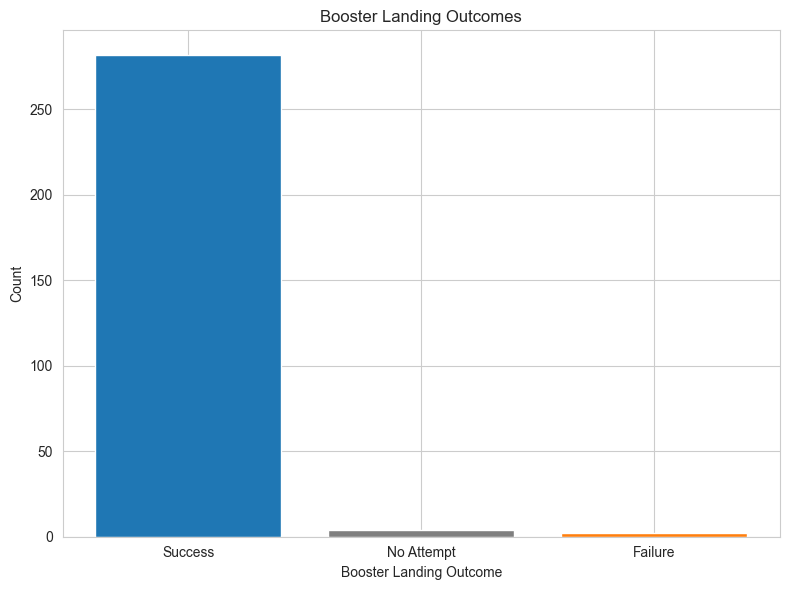

In [19]:
# 1. Booster Landing Outcome Bar
plt.figure(figsize=(8, 6))
booster_counts = df['booster_landing'].value_counts()
colors = ['#1f77b4' if x == 'Success' else '#ff7f0e' if x == 'Failure' else '#7f7f7f' for x in booster_counts.index]
plt.bar(booster_counts.index, booster_counts.values, color=colors)
plt.title('Booster Landing Outcomes')
plt.xlabel('Booster Landing Outcome')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(output_dir / '01_booster_landing_outcomes.png')
plt.show()


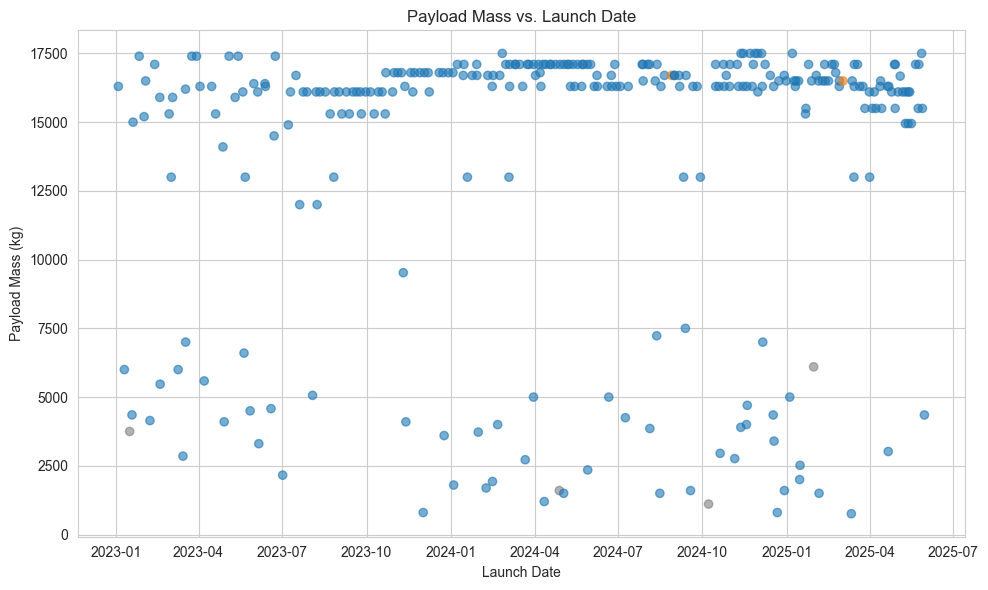

In [20]:
# 2. Payload Mass vs. Launch Date Scatter
plt.figure(figsize=(10, 6))
colors = df['booster_landing'].map({'Success': '#1f77b4', 'Failure': '#ff7f0e', 'Unknown': '#7f7f7f'}).fillna('#7f7f7f')
plt.scatter(df['date_and_time_utc'], df['payload_mass'], c=colors, alpha=0.6)
plt.title('Payload Mass vs. Launch Date')
plt.xlabel('Launch Date')
plt.ylabel('Payload Mass (kg)')
plt.tight_layout()
plt.savefig(output_dir / '02_payload_mass_vs_launch_date.png')
plt.show()

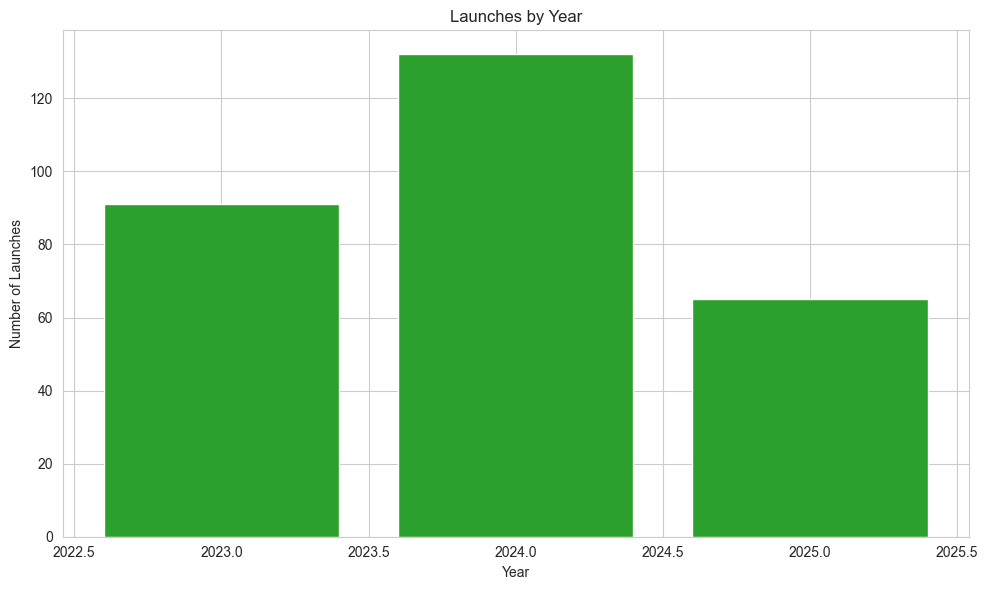

In [21]:
# 3. Launches by Year Bar
plt.figure(figsize=(10, 6))
launches_by_year = df['year'].value_counts().sort_index()
plt.bar(launches_by_year.index, launches_by_year.values, color='#2ca02c')
plt.title('Launches by Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.tight_layout()
plt.savefig(output_dir / '03_launches_by_year.png')
plt.show()

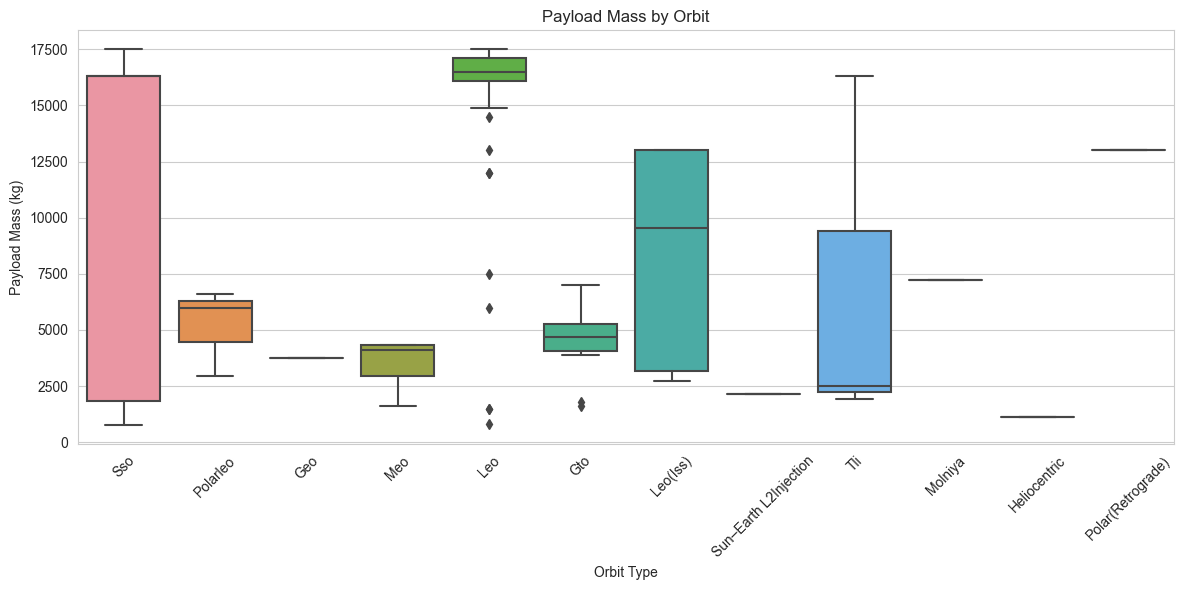

In [22]:
# 4. Payload Mass by Orbit Box
plt.figure(figsize=(12, 6))
sns.boxplot(x='orbit', y='payload_mass', data=df)
plt.title('Payload Mass by Orbit')
plt.xlabel('Orbit Type')
plt.ylabel('Payload Mass (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_dir / '04_payload_mass_by_orbit.png')
plt.show()


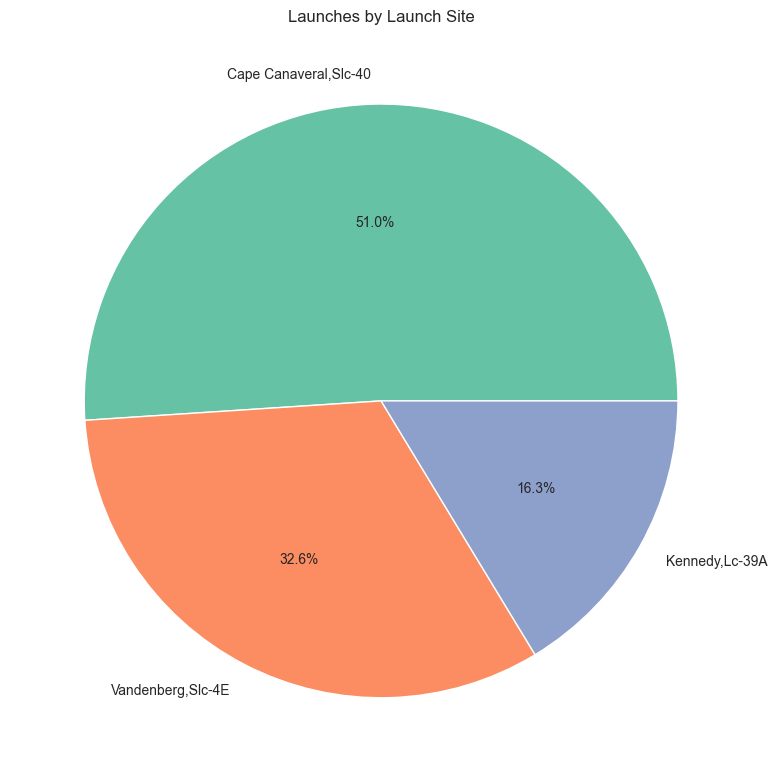

In [23]:
# 5. Launch Site Pie
plt.figure(figsize=(8, 8))
launch_site_counts = df['launch_site'].value_counts()
plt.pie(launch_site_counts.values, labels=launch_site_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Launches by Launch Site')
plt.tight_layout()
plt.savefig(output_dir / '05_launch_site_pie.png')
plt.show()


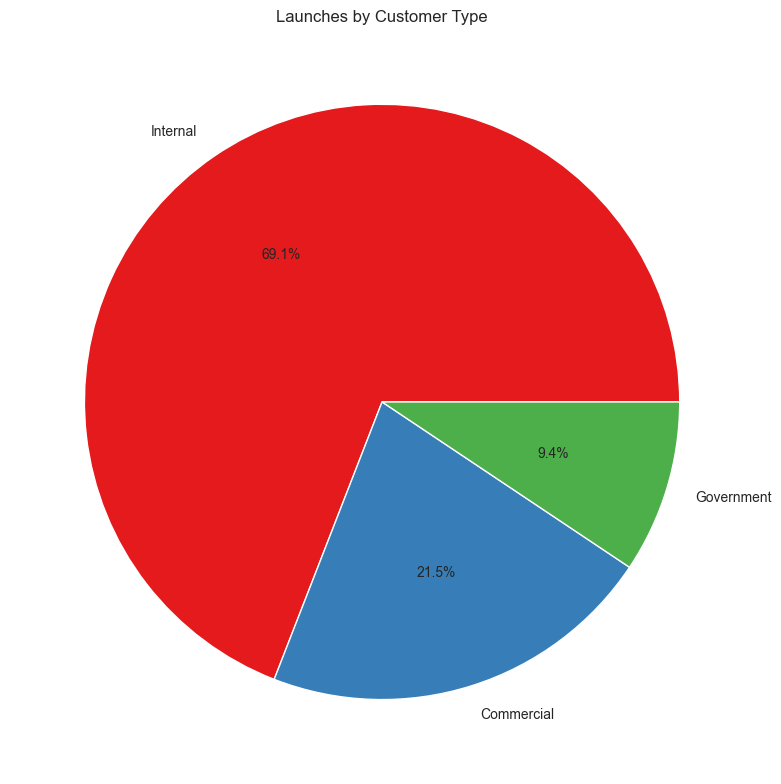

In [24]:
# 6. Customer Type Pie
plt.figure(figsize=(8, 8))
customer_type_counts = df['customer_type'].value_counts()
plt.pie(customer_type_counts.values, labels=customer_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Launches by Customer Type')
plt.tight_layout()
plt.savefig(output_dir / '06_customer_type_pie.png')
plt.show()

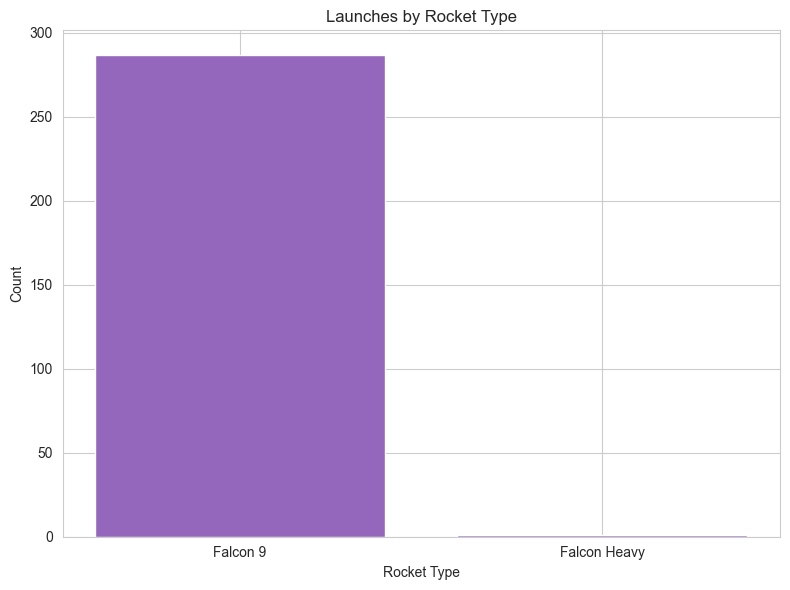

In [25]:
# 7. Rocket Type Bar
plt.figure(figsize=(8, 6))
rocket_type_counts = df['rocket_type'].value_counts()
plt.bar(rocket_type_counts.index, rocket_type_counts.values, color='#9467bd')
plt.title('Launches by Rocket Type')
plt.xlabel('Rocket Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(output_dir / '07_rocket_type_bar.png')
plt.show()


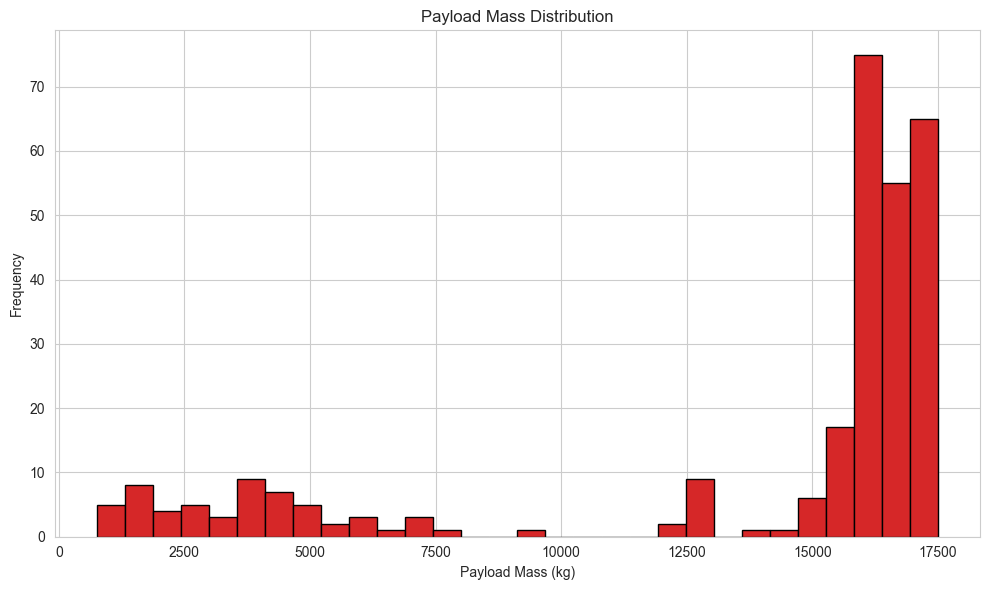

In [26]:
# 8. Payload Mass Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['payload_mass'], bins=30, color='#d62728', edgecolor='black')
plt.title('Payload Mass Distribution')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(output_dir / '08_payload_mass_histogram.png')
plt.show()

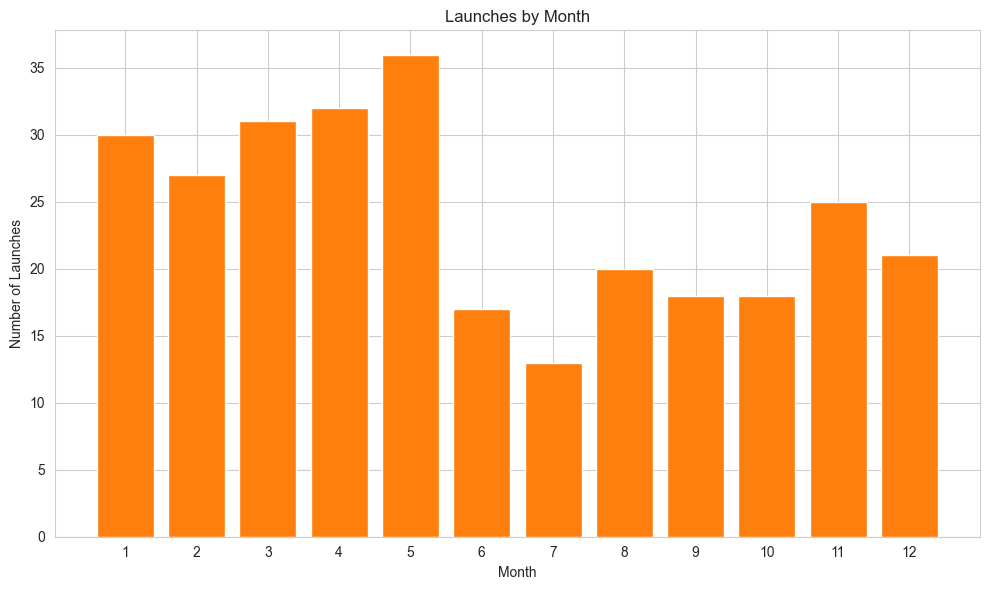

In [27]:
# 9. Launches by Month Bar
plt.figure(figsize=(10, 6))
launches_by_month = df['month'].value_counts().sort_index()
plt.bar(launches_by_month.index, launches_by_month.values, color='#ff7f0e')
plt.title('Launches by Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(ticks=range(1, 13))
plt.tight_layout()
plt.savefig(output_dir / '09_launches_by_month.png')
plt.show()

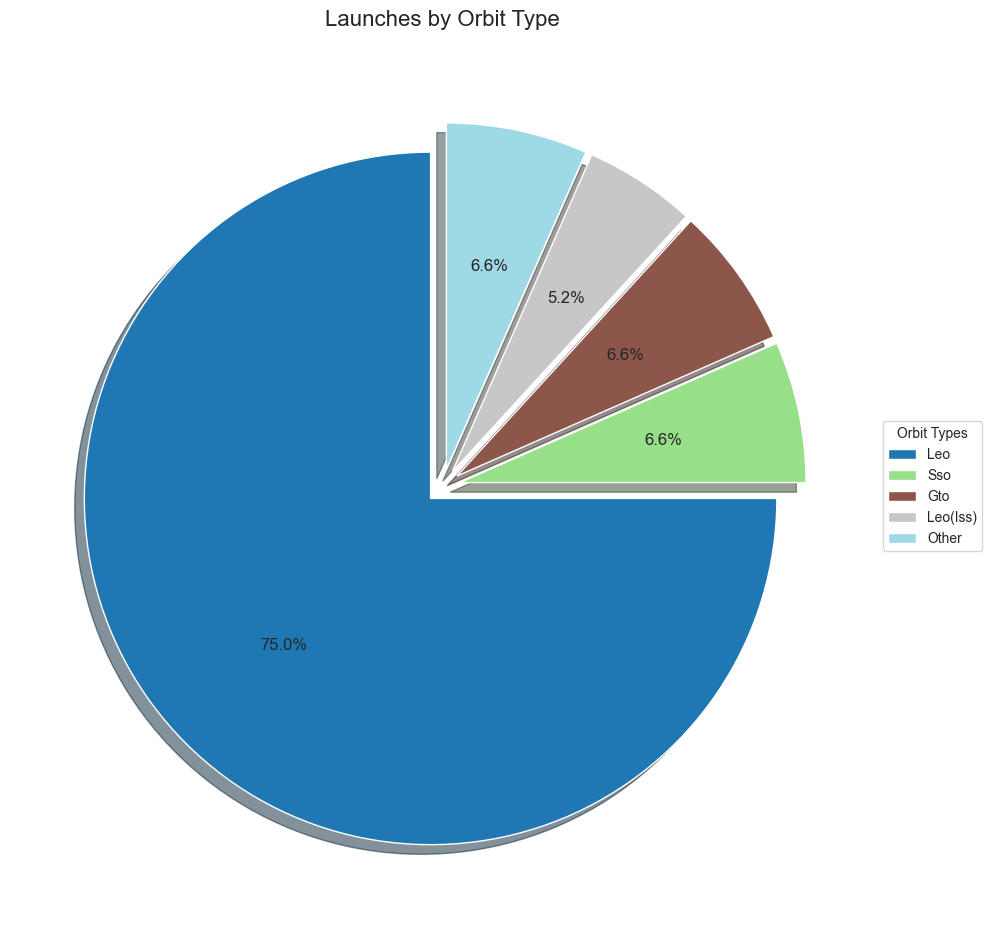

In [28]:
# 10. Orbit Type Pie
plt.figure(figsize=(10, 10))  # Larger figure for clarity
orbit_type_counts = df['orbit'].value_counts()
# Group orbits with <5% of total launches into 'Other'
threshold = 0.05 * orbit_type_counts.sum()
orbit_type_counts_grouped = orbit_type_counts[orbit_type_counts >= threshold]
orbit_type_counts_grouped['Other'] = orbit_type_counts[orbit_type_counts < threshold].sum()
# Define colors and explode for emphasis
colors = plt.cm.tab20(np.linspace(0, 1, len(orbit_type_counts_grouped)))
explode = [0.05 if count >= threshold else 0 for count in orbit_type_counts_grouped]
# Plot pie chart
plt.pie(
    orbit_type_counts_grouped.values,
    labels=None,  # Remove labels from pie
    autopct=lambda p: f'{p:.1f}%' if p > 2 else '',  # Show % only for >2%
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12},
    startangle=90
)
plt.title('Launches by Orbit Type', fontsize=16, pad=20)
# Add legend
plt.legend(
    orbit_type_counts_grouped.index,
    title="Orbit Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)
plt.tight_layout()
plt.savefig(output_dir / '10_orbit_type_pie.png', bbox_inches='tight')
plt.show()

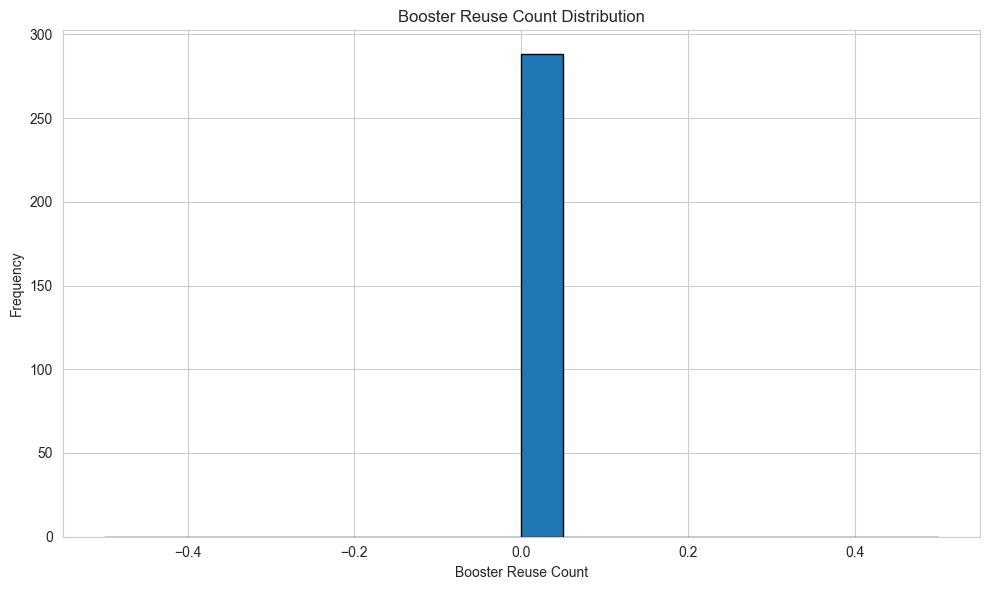

In [29]:
# 11. Booster Reuse Count Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['booster_reuse_count'], bins=20, color='#1f77b4', edgecolor='black')
plt.title('Booster Reuse Count Distribution')
plt.xlabel('Booster Reuse Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(output_dir / '11_booster_reuse_count_histogram.png')
plt.show()


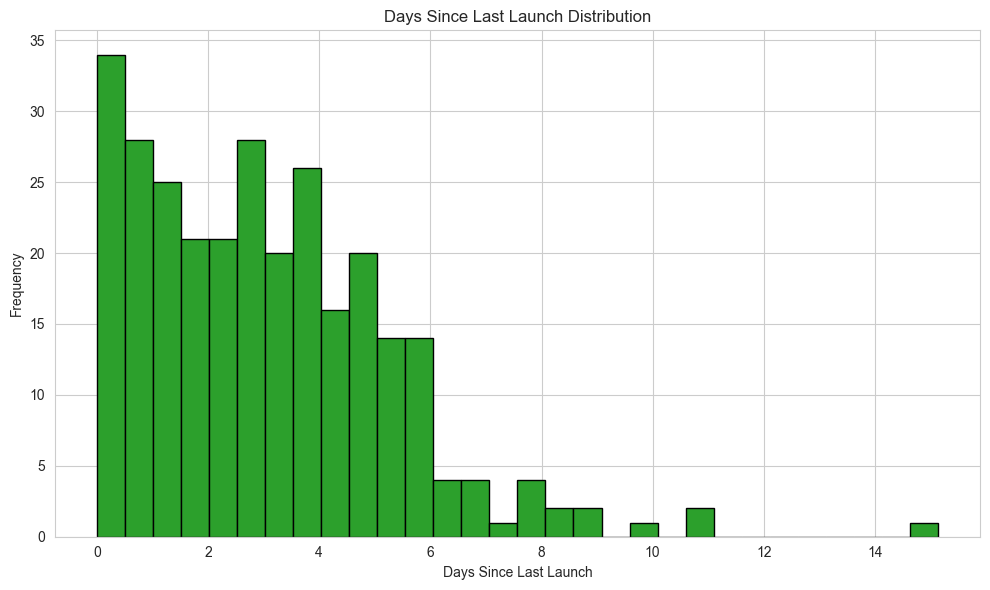

In [30]:
# 12. Days Since Last Launch Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['days_since_last_launch'], bins=30, color='#2ca02c', edgecolor='black')
plt.title('Days Since Last Launch Distribution')
plt.xlabel('Days Since Last Launch')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(output_dir / '12_days_since_last_launch_histogram.png')
plt.show()

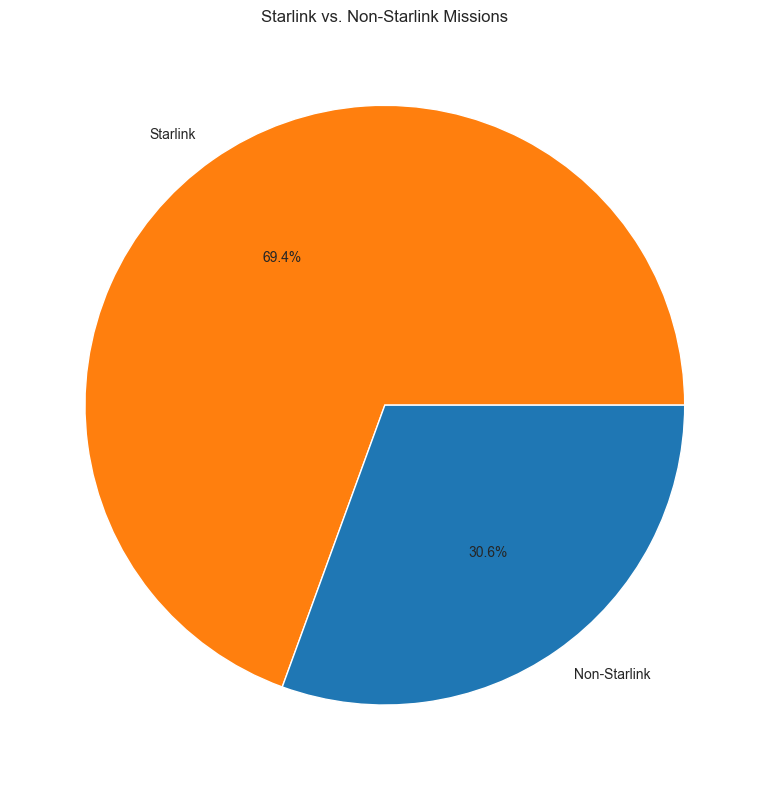

In [31]:
# 13. Starlink vs. Non-Starlink Pie
plt.figure(figsize=(8, 8))
starlink_counts = df['is_starlink'].value_counts()
plt.pie(starlink_counts.values, labels=['Starlink' if x else 'Non-Starlink' for x in starlink_counts.index],
        autopct='%1.1f%%', colors=['#ff7f0e', '#1f77b4'])
plt.title('Starlink vs. Non-Starlink Missions')
plt.tight_layout()
plt.savefig(output_dir / '13_starlink_pie.png')
plt.show()

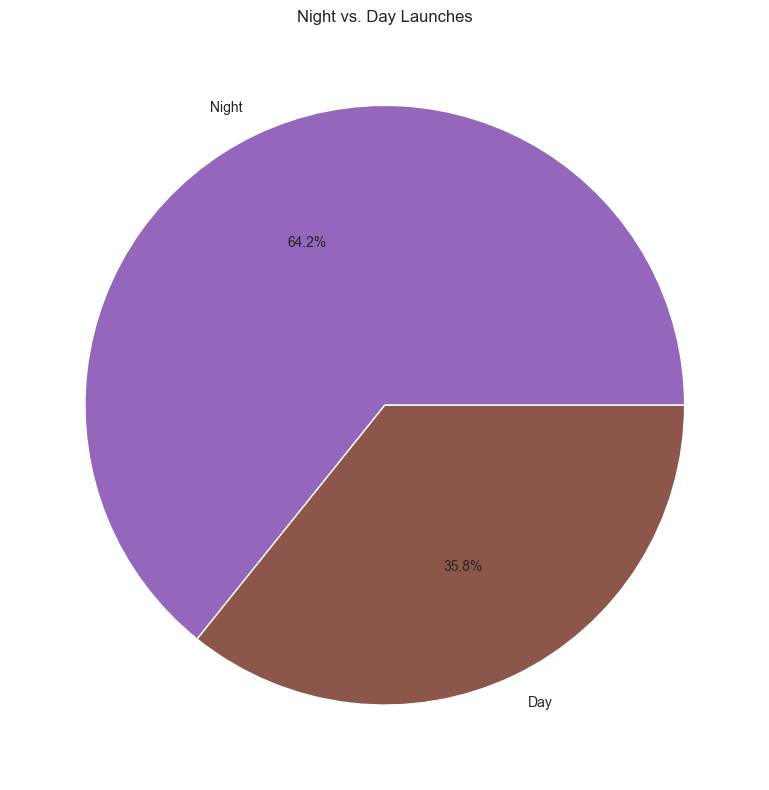

In [32]:
# 14. Night Launch Pie
plt.figure(figsize=(8, 8))
night_launch_counts = df['is_night_launch'].value_counts()
plt.pie(night_launch_counts.values, labels=['Night' if x else 'Day' for x in night_launch_counts.index],
        autopct='%1.1f%%', colors=['#9467bd', '#8c564b'])
plt.title('Night vs. Day Launches')
plt.tight_layout()
plt.savefig(output_dir / '14_night_launch_pie.png')
plt.show()


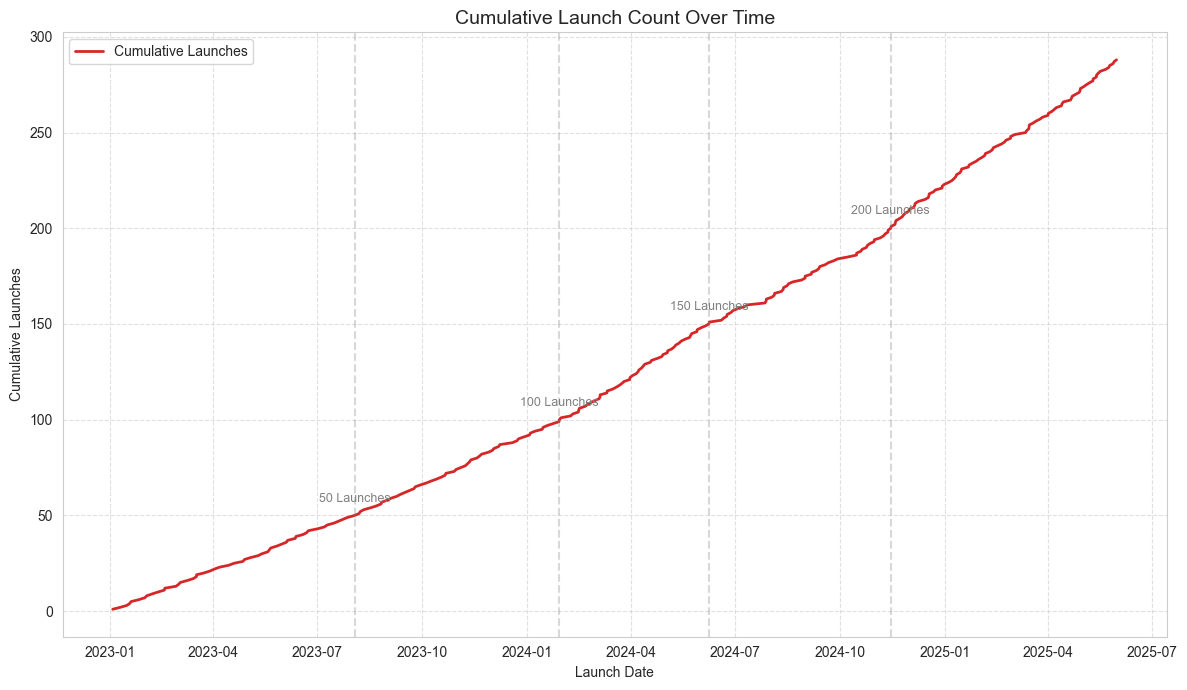

In [33]:
# 15. Cumulative Launch Count Line
# Ensure data is sorted by launch date
df_sorted = df.sort_values('date_and_time_utc').reset_index(drop=True)

# Add cumulative count column
df_sorted['cumulative_launches'] = range(1, len(df_sorted) + 1)

# Plot
plt.figure(figsize=(12, 7))
plt.plot(
    df_sorted['date_and_time_utc'],
    df_sorted['cumulative_launches'],
    color='#d62728',
    linewidth=2,
    label='Cumulative Launches'
)

# Optional: Highlight major milestones
milestones = [50, 100, 150, 200]  # Customize based on your data
for milestone in milestones:
    if milestone < len(df_sorted):
        date = df_sorted.loc[milestone - 1, 'date_and_time_utc']
        count = df_sorted.loc[milestone - 1, 'cumulative_launches']
        plt.axvline(date, color='gray', linestyle='--', alpha=0.3)
        plt.annotate(f'{milestone} Launches', xy=(date, count),
                     xytext=(0, 10), textcoords='offset points',
                     ha='center', fontsize=9, color='gray')

# Final formatting
plt.title('Cumulative Launch Count Over Time', fontsize=14)
plt.xlabel('Launch Date')
plt.ylabel('Cumulative Launches')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig(output_dir / '15_cumulative_launch_count_enhanced.png')
plt.show()


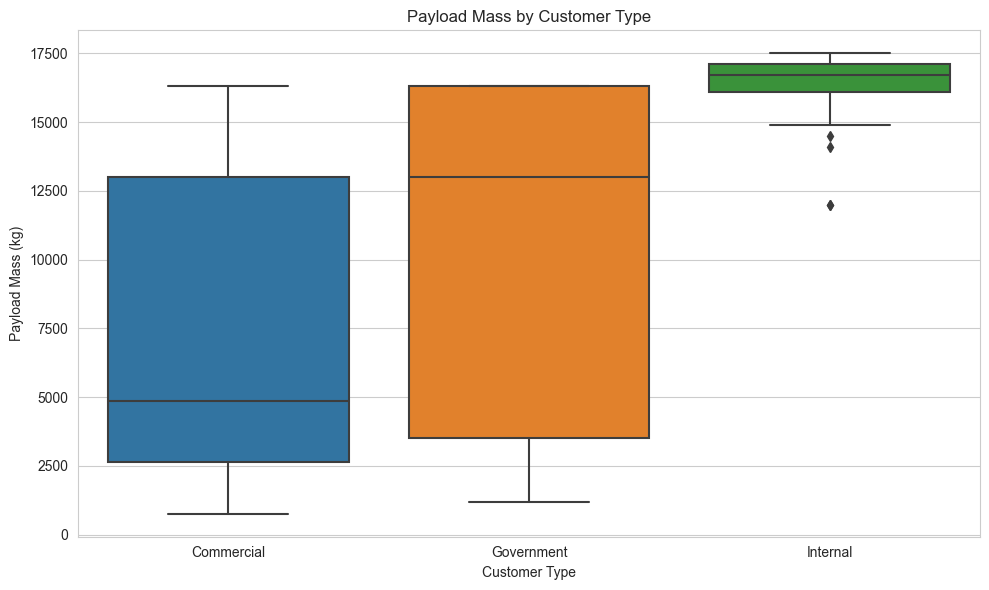

In [34]:
# 16. Payload Mass by Customer Type Box
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_type', y='payload_mass', data=df)
plt.title('Payload Mass by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Payload Mass (kg)')
plt.tight_layout()
plt.savefig(output_dir / '16_payload_mass_by_customer_type.png')
plt.show()

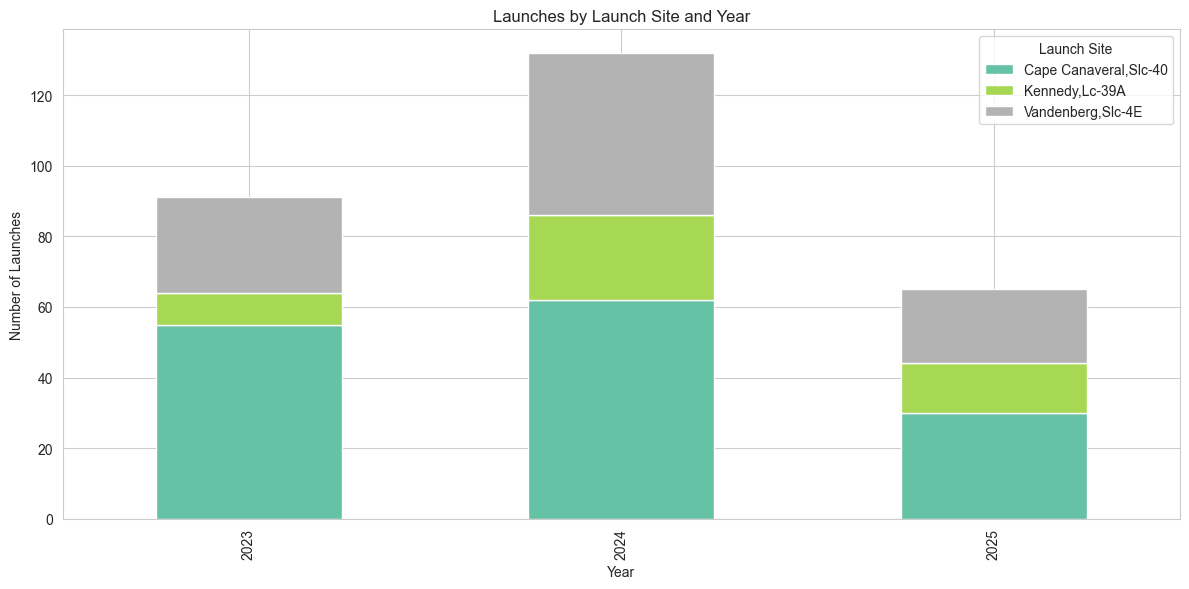

In [35]:
# 17. Launches by Launch Site and Year Stacked Bar
plt.figure(figsize=(12, 6))
pivot_table = df.pivot_table(index='year', columns='launch_site', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('Launches by Launch Site and Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Launch Site')
plt.tight_layout()
plt.savefig(output_dir / '17_launches_by_site_year.png')
plt.show()

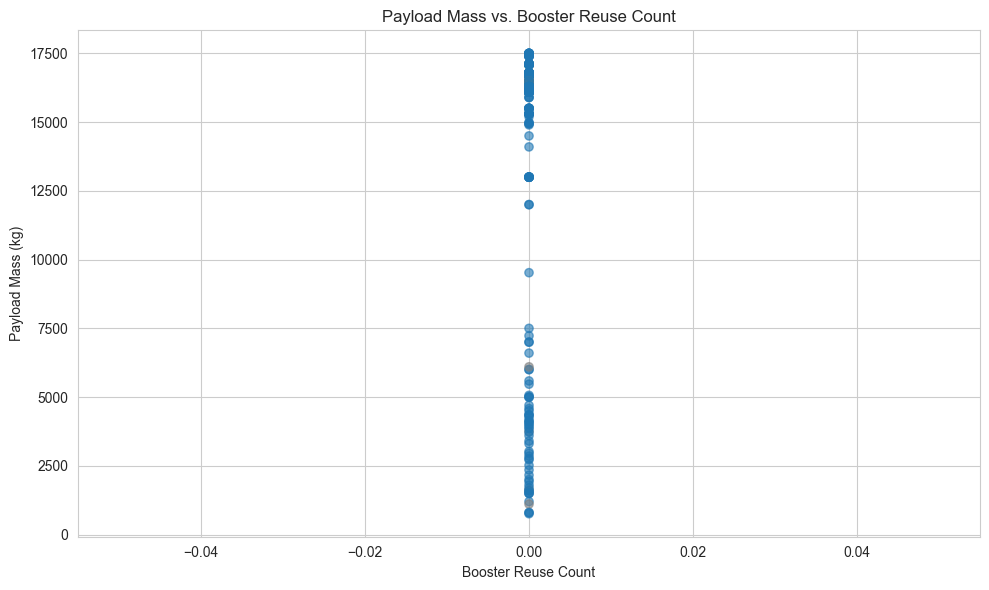

In [36]:
# 18. Payload Mass vs. Booster Reuse Scatter
plt.figure(figsize=(10, 6))
scatter_colors = df['booster_landing'].map({'Success': '#1f77b4', 'Failure': '#ff7f0e', 'Unknown': '#7f7f7f'}).fillna('#7f7f7f')
plt.scatter(df['booster_reuse_count'], df['payload_mass'], c=scatter_colors, alpha=0.6)
plt.title('Payload Mass vs. Booster Reuse Count')
plt.xlabel('Booster Reuse Count')
plt.ylabel('Payload Mass (kg)')
plt.tight_layout()
plt.savefig(output_dir / '18_payload_mass_vs_booster_reuse.png')
plt.show()

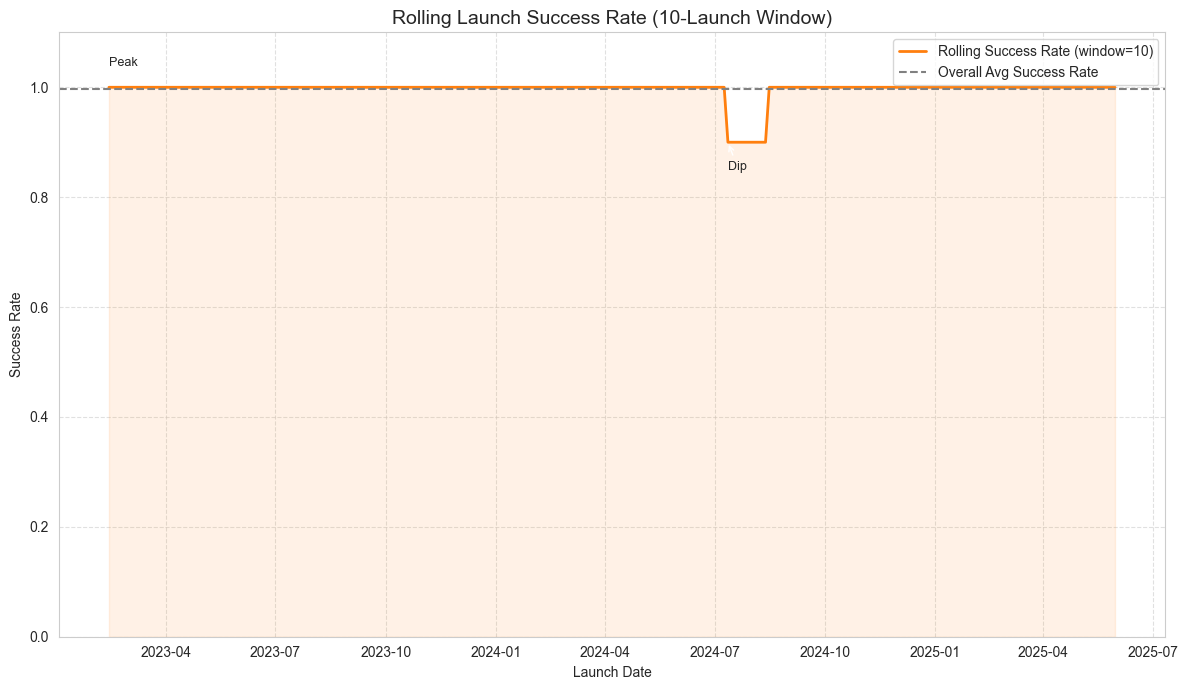

In [37]:
# 19. Launch Success Rate Rolling Line
# Ensure date is sorted
df = df.sort_values('date_and_time_utc')

# Compute rolling success rate
df['launch_success'] = df['launch_outcome'] == 'Success'
rolling_window = 10
df['rolling_success_rate'] = df['launch_success'].rolling(window=rolling_window).mean()

# Compute overall mean success rate for reference
overall_success_rate = df['launch_success'].mean()

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(
    df['date_and_time_utc'],
    df['rolling_success_rate'],
    color='#ff7f0e',
    linewidth=2,
    label=f'Rolling Success Rate (window={rolling_window})'
)

# Highlight overall average
plt.axhline(overall_success_rate, color='gray', linestyle='--', linewidth=1.5, label='Overall Avg Success Rate')

# Optional: fill area under curve
plt.fill_between(
    df['date_and_time_utc'],
    df['rolling_success_rate'],
    alpha=0.1,
    color='#ff7f0e'
)

# Optional: annotate highest/lowest rolling success
max_idx = df['rolling_success_rate'].idxmax()
min_idx = df['rolling_success_rate'].idxmin()
plt.annotate('Peak', xy=(df.loc[max_idx, 'date_and_time_utc'], df.loc[max_idx, 'rolling_success_rate']),
             xytext=(0, 15), textcoords='offset points', arrowprops=dict(arrowstyle='->'), fontsize=9)
plt.annotate('Dip', xy=(df.loc[min_idx, 'date_and_time_utc'], df.loc[min_idx, 'rolling_success_rate']),
             xytext=(0, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->'), fontsize=9)

# Final formatting
plt.title('Rolling Launch Success Rate (10-Launch Window)', fontsize=14)
plt.xlabel('Launch Date')
plt.ylabel('Success Rate')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig(output_dir / '19_launch_success_rate_rolling_enhanced.png')
plt.show()

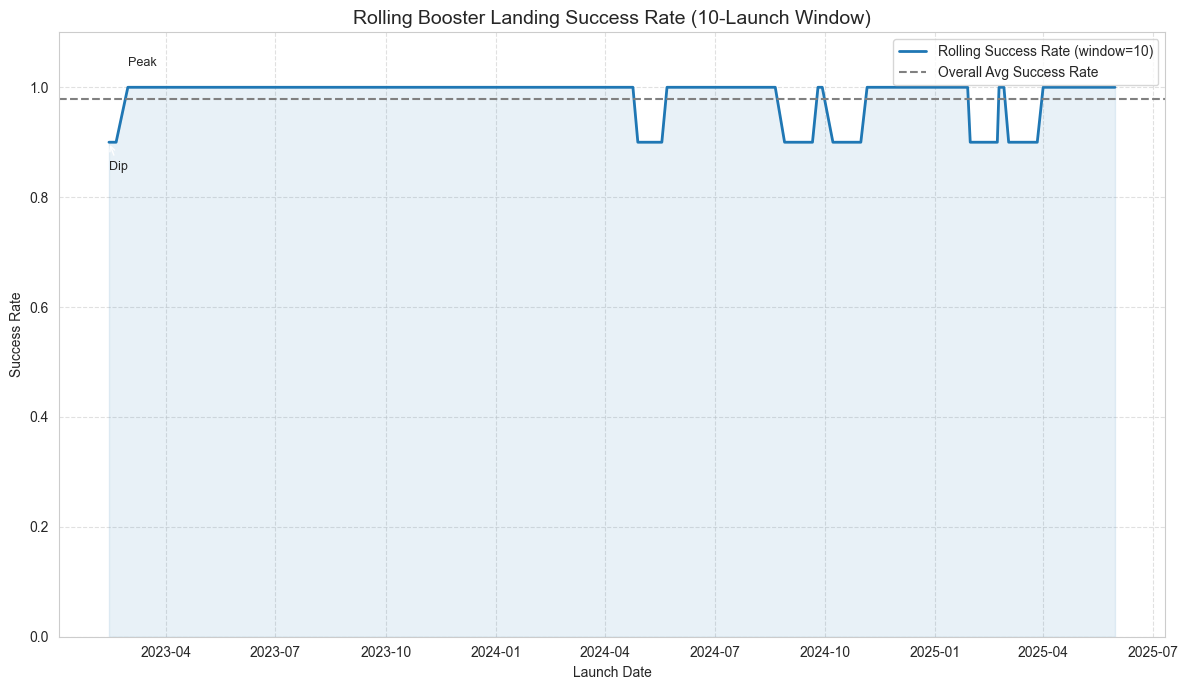

In [41]:
# 20. Booster Landing Success Rate Rolling Line
# Ensure dataframe is sorted by date
df = df.sort_values('date_and_time_utc')

# Compute rolling booster success
df['booster_landing_success'] = df['booster_landing'] == 'Success'
rolling_window = 10
df['rolling_booster_success_rate'] = df['booster_landing_success'].rolling(window=rolling_window).mean()

# Overall average booster success rate
booster_success_avg = df['booster_landing_success'].mean()

# Plot
plt.figure(figsize=(12, 7))
plt.plot(
    df['date_and_time_utc'],
    df['rolling_booster_success_rate'],
    color='#1f77b4',
    linewidth=2,
    label=f'Rolling Success Rate (window={rolling_window})'
)

# Highlight overall average
plt.axhline(booster_success_avg, color='gray', linestyle='--', linewidth=1.5, label='Overall Avg Success Rate')

# Optional: shaded region under the curve
plt.fill_between(
    df['date_and_time_utc'],
    df['rolling_booster_success_rate'],
    alpha=0.1,
    color='#1f77b4'
)

# Optional: annotate peak and dip
max_idx = df['rolling_booster_success_rate'].idxmax()
min_idx = df['rolling_booster_success_rate'].idxmin()
plt.annotate('Peak', xy=(df.loc[max_idx, 'date_and_time_utc'], df.loc[max_idx, 'rolling_booster_success_rate']),
             xytext=(0, 15), textcoords='offset points', arrowprops=dict(arrowstyle='->'), fontsize=9)
plt.annotate('Dip', xy=(df.loc[min_idx, 'date_and_time_utc'], df.loc[min_idx, 'rolling_booster_success_rate']),
             xytext=(0, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->'), fontsize=9)

# Final formatting
plt.title('Rolling Booster Landing Success Rate (10-Launch Window)', fontsize=14)
plt.xlabel('Launch Date')
plt.ylabel('Success Rate')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig(output_dir / '20_booster_landing_success_rate_rolling_enhanced.png')
plt.show()


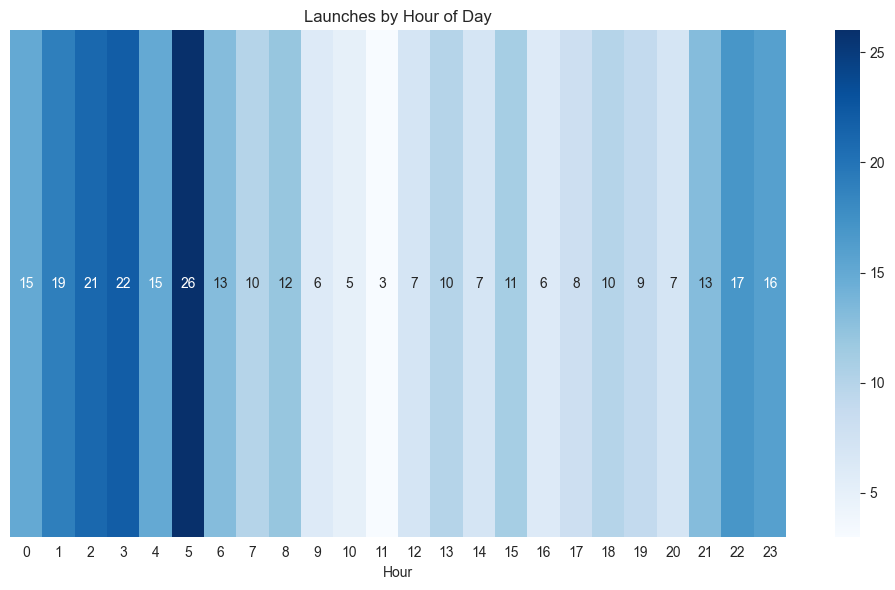

In [42]:
# 21. Launches by Hour Heatmap
plt.figure(figsize=(10, 6))
hour_counts = df['hour'].value_counts().sort_index()
sns.heatmap([hour_counts.reindex(range(24), fill_value=0).values], cmap='Blues', annot=True, fmt='.0f')
plt.title('Launches by Hour of Day')
plt.xlabel('Hour')
plt.yticks([])
plt.tight_layout()
plt.savefig(output_dir / '21_launches_by_hour_heatmap.png')
plt.show()

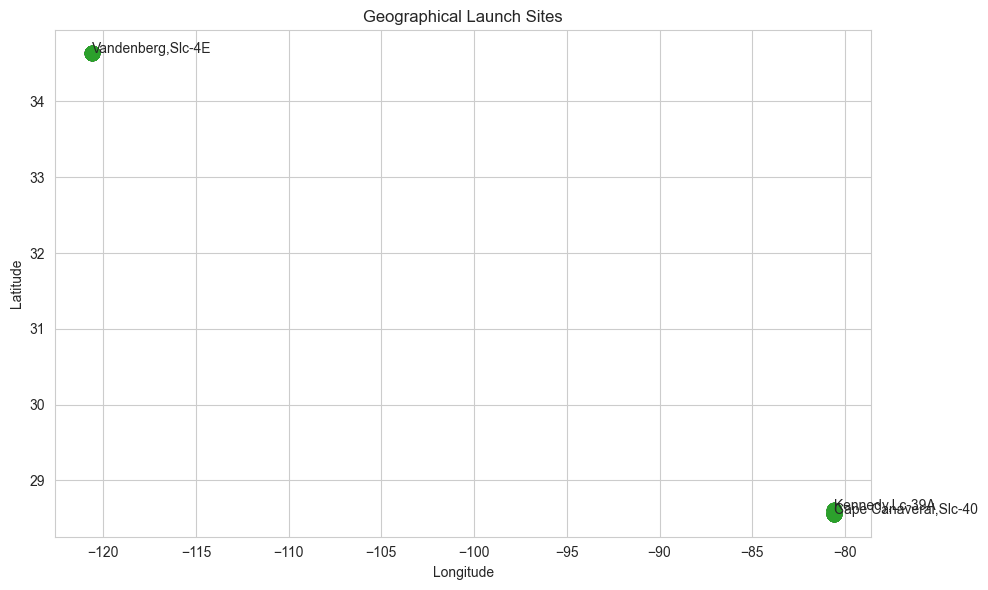

In [40]:
# 22. Geographical Launch Sites Scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], s=100, c='#2ca02c', alpha=0.5)
for site, group in df.groupby('launch_site'):
    plt.annotate(site, (group['longitude'].mean(), group['latitude'].mean()), fontsize=10)
plt.title('Geographical Launch Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.savefig(output_dir / '22_geographical_launch_sites.png')
plt.show()